# Look at Vertical Eddy Diffusivity for Wave Treatment Cases #

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np
from salishsea_tools import viz_tools

%matplotlib inline

## Choose First Day of Run

In [5]:
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testA/SalishSea_1h_20170307_20170316_grid_W_20170307-20170307.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test1/SalishSea_1h_20170307_20170316_grid_W_20170307-20170307.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testa/SalishSea_1h_20170307_20170316_grid_W_20170307-20170307.nc')

## Set up Mesh

In [6]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][0]
depth = mesh.variables['gdepw_1d'][0]

## Choose Peak Wind at Hour 20

In [110]:
vert_eddy_diff = base.variables['vert_eddy_visc'][20]
vert_eddy_diff = np.ma.array( vert_eddy_diff, copy=True, mask=tmask==0)

vert_eddy_diffa = testa.variables['vert_eddy_visc'][20]
vert_eddy_diffa = np.ma.array( vert_eddy_diffa, copy=True, mask=tmask==0)

vert_eddy_diffb = testb.variables['vert_eddy_visc'][20]
vert_eddy_diffb = np.ma.array( vert_eddy_diffb, copy=True, mask=tmask==0)

## Surface Plot of Vertical Eddy Diffusivity ##

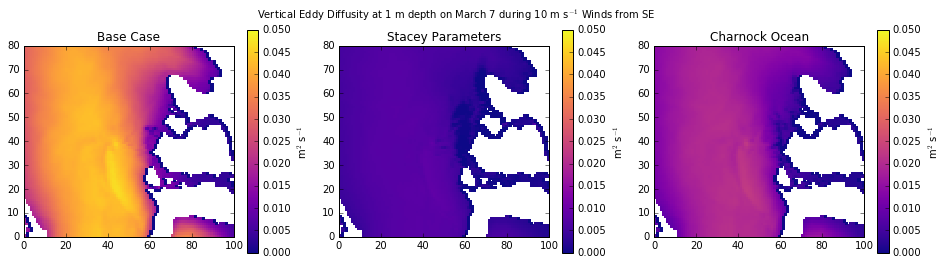

In [111]:
mesh = []
imin, imax = 390, 470
jmin, jmax = 250, 350
vmin, vmax = 0, 0.05
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
mesh.append(axs[0].pcolormesh(vert_eddy_diff[1, imin:imax, jmin:jmax], cmap='plasma', vmax=vmax, vmin=vmin))
mesh.append(axs[1].pcolormesh(vert_eddy_diffa[1, imin:imax, jmin:jmax], cmap='plasma', vmax=vmax, vmin=vmin))
mesh.append(axs[2].pcolormesh(vert_eddy_diffb[1, imin:imax, jmin:jmax], cmap='plasma', vmax=vmax, vmin=vmin))


for ax, msh in zip([axs[0], axs[1], axs[2]], [mesh[0], mesh[1], mesh[2]]):
    viz_tools.set_aspect(ax)
    cbar = fig.colorbar(msh, ax=ax)
    cbar.set_label('m$^2$ s$^{-1}$')

fig.suptitle('Vertical Eddy Diffusity at 1 m depth on March 7 during 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case')
axs[1].set_title('Stacey Parameters')
axs[2].set_title('Charnock Ocean');

## Vertical Profiles

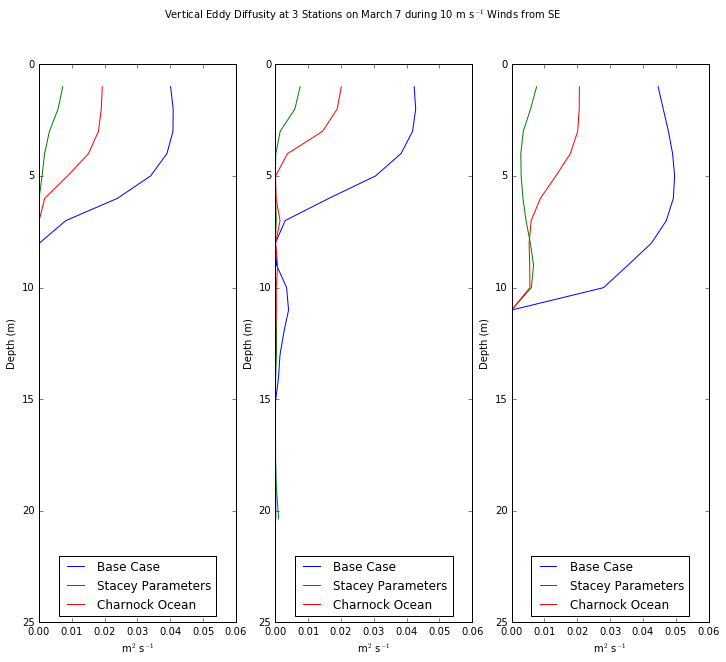

In [112]:
ii = imin+25
mz = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

for ax, jj in zip([axs[0], axs[1], axs[2]], [jmin+20, jmin+30, jmin+40]):
    ax.plot(vert_eddy_diff[1:mz, ii, jj], depth[1:mz], label='Base Case')
    ax.plot(vert_eddy_diffa[1:mz, ii, jj], depth[1:mz], label='Stacey Parameters')
    ax.plot(vert_eddy_diffb[1:mz, ii, jj], depth[1:mz], label='Charnock Ocean')
    ax.invert_yaxis()
    ax.legend(loc='lower center')
    ax.set_xlim((0, 0.06))
    ax.set_xlabel('m$^2$ s$^{-1}$')
    ax.set_ylabel('Depth (m)')
fig.suptitle('Vertical Eddy Diffusity at 3 Stations on March 7 during 10 m s$^{-1}$ Winds from SE');

In [124]:
jj=20
vert_eddy_diff = base.variables['vert_eddy_visc'][:, :, ii, jmin+jj]
for t in range(24):
    vert_eddy_diff[t] = np.ma.array(vert_eddy_diff[t], copy=True, mask=tmask[:, ii, jmin+jj]==0)

vert_eddy_diffa = testa.variables['vert_eddy_visc'][:, :, ii, jmin+jj]
for t in range(24):
    vert_eddy_diffa[t] = np.ma.array(vert_eddy_diffa[t], copy=True, mask=tmask[:, ii, jmin+jj]==0)

vert_eddy_diffb = testb.variables['vert_eddy_visc'][:, :, ii, jmin+jj]
for t in range(24):
    vert_eddy_diffb[t] = np.ma.array(vert_eddy_diffb[t], copy=True, mask=tmask[:, ii, jmin+jj]==0)

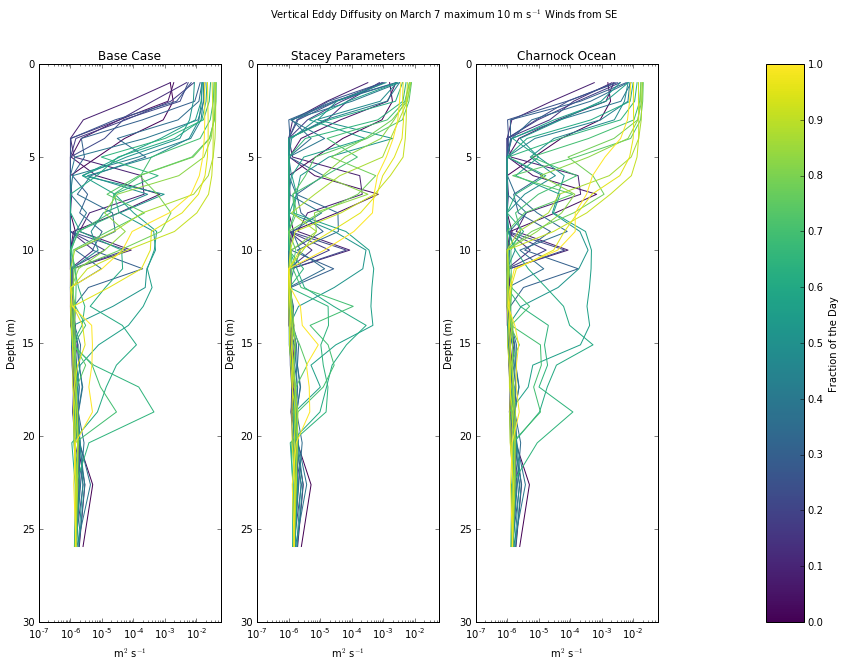

In [125]:
mz = 22
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0, 1, 24))

for t in range(24):
    axs[0].semilogx(
        vert_eddy_diff[t, 1:mz],
        depth[1:mz],
        label='Base Case',
        color=colors[t])
    axs[1].semilogx(
        vert_eddy_diffa[t, 1:mz],
        depth[1:mz],
        label='Stacey Parameters',
        color=colors[t])
    axs[2].semilogx(
        vert_eddy_diffb[t, 1:mz],
        depth[1:mz],
        label='Charnock Ocean',
        color=colors[t])

for ax in [axs[0], axs[1], axs[2]]:
    ax.invert_yaxis()
    ax.set_xlim((1e-7, 0.06))
    ax.set_xlabel('m$^2$ s$^{-1}$')
    ax.set_ylabel('Depth (m)')

fig.suptitle(
    'Vertical Eddy Diffusity on March 7 maximum 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case')
axs[1].set_title('Stacey Parameters')
axs[2].set_title('Charnock Ocean')

cbar = mpl.colorbar.ColorbarBase(axs[3], cmap='viridis')
cbar.set_label("Fraction of the Day")
axs[3].set_aspect(15, adjustable='box-forced')

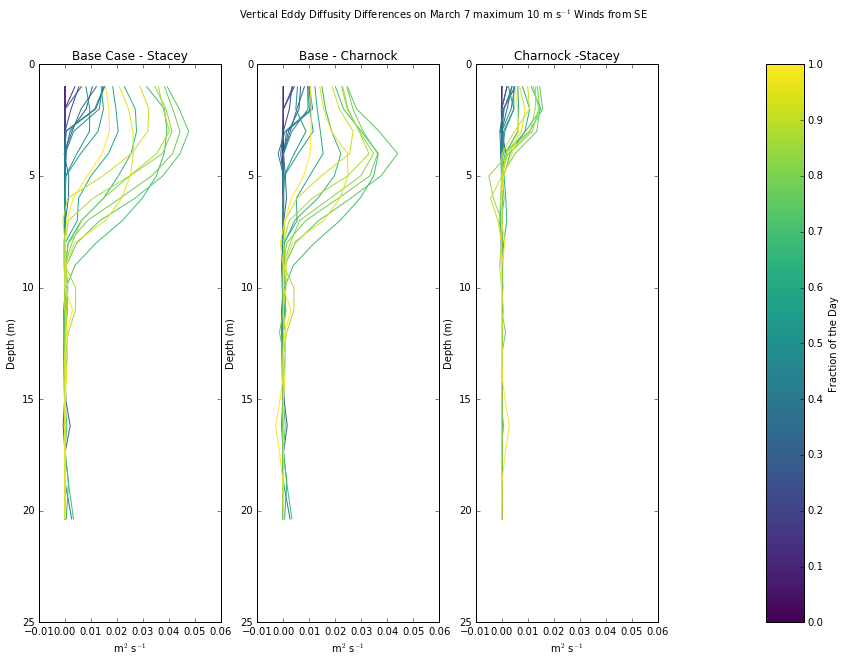

In [13]:
mz = 20
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0,1,24))

for t in range(24):
    axs[0].plot(vert_eddy_diff[t, 1:mz]-vert_eddy_diffa[t, 1:mz], depth[1:mz], color=colors[t])
    axs[1].plot(vert_eddy_diff[t, 1:mz]-vert_eddy_diffb[t, 1:mz], depth[1:mz], color=colors[t])
    axs[2].plot(vert_eddy_diffb[t, 1:mz]-vert_eddy_diffa[t, 1:mz], depth[1:mz],color=colors[t])

for ax in [axs[0], axs[1], axs[2]]:
    ax.invert_yaxis()
    ax.set_xlim((-0.01, 0.06))
    ax.set_xlabel('m$^2$ s$^{-1}$')
    ax.set_ylabel('Depth (m)')
    
fig.suptitle('Vertical Eddy Diffusity Differences on March 7 maximum 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case - Stacey')
axs[1].set_title('Base - Charnock')
axs[2].set_title('Charnock -Stacey');

cbar = mpl.colorbar.ColorbarBase(axs[3], cmap='viridis')
cbar.set_label("Fraction of the Day")
axs[3].set_aspect(15, adjustable='box-forced')

In [15]:
baseT=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testA/SalishSea_1h_20170307_20170316_grid_T_20170307-20170307.nc')
testaT=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test1/SalishSea_1h_20170307_20170316_grid_T_20170307-20170307.nc')
testbT=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testa/SalishSea_1h_20170307_20170316_grid_T_20170307-20170307.nc')

In [34]:
stn, stni = 0, 80
vosaline = baseT.variables['vosaline'][:, :, ii+stni, jmin+stn]
for t in range(24):
    vosaline[t] = np.ma.array(vosaline[t], copy=True, mask=tmask[:, ii+stni, jmin+stn]==0)

vosalinea = testaT.variables['vosaline'][:, :, ii+stni, jmin+stn]
for t in range(24):
    vosalinea[t] = np.ma.array(vosalinea[t], copy=True, mask=tmask[:, ii+stni, jmin+stn]==0)

vosalineb = testbT.variables['vosaline'][:, :, ii+stni, jmin+stn]
for t in range(24):
    vosalineb[t] = np.ma.array(vosalineb[t], copy=True, mask=tmask[:, ii+stni, jmin+stn]==0)

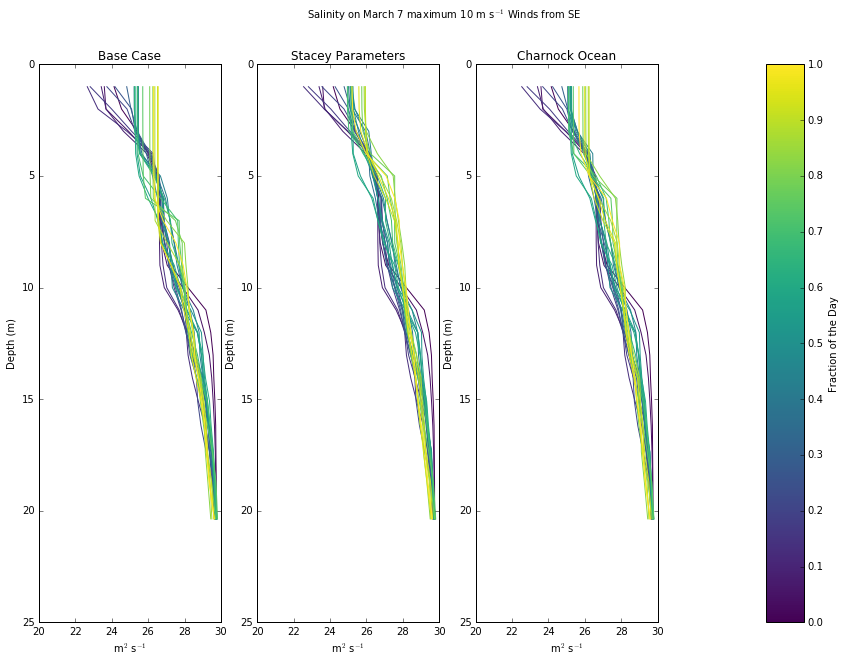

In [35]:
mz = 20
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0,1,24))

for t in range(24):
    axs[0].plot(vosaline[t, 1:mz], depth[1:mz], label='Base Case', color=colors[t])
    axs[1].plot(vosalinea[t, 1:mz], depth[1:mz], label='Stacey Parameters', color=colors[t])
    axs[2].plot(vosalineb[t, 1:mz], depth[1:mz], label='Charnock Ocean', color=colors[t])

for ax in [axs[0], axs[1], axs[2]]:
    ax.invert_yaxis()
    ax.set_xlim((20, 30))
    ax.set_xlabel('m$^2$ s$^{-1}$')
    ax.set_ylabel('Depth (m)')
    
fig.suptitle('Salinity on March 7 maximum 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case')
axs[1].set_title('Stacey Parameters')
axs[2].set_title('Charnock Ocean');

cbar = mpl.colorbar.ColorbarBase(axs[3], cmap='viridis')
cbar.set_label("Fraction of the Day")
axs[3].set_aspect(15, adjustable='box-forced')

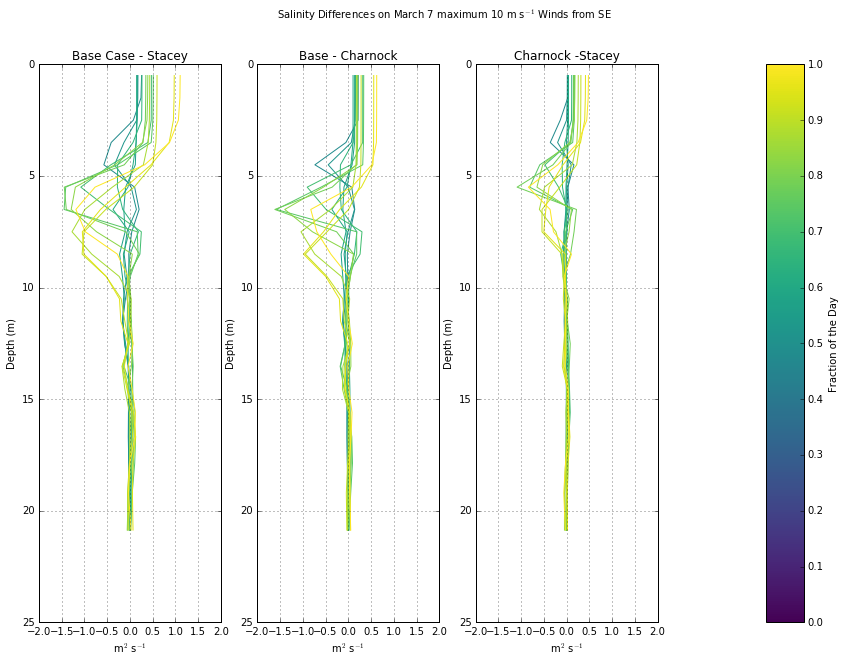

In [38]:
mz = 20
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0,1,24))

for t in range(11, 24):
    axs[0].plot(vosaline[t, :mz]-vosalinea[t, :mz], depth[:mz]+0.5, color=colors[t])
    axs[1].plot(vosaline[t, :mz]-vosalineb[t, :mz], depth[:mz]+0.5, color=colors[t])
    axs[2].plot(vosalineb[t, :mz]-vosalinea[t, :mz], depth[:mz]+0.5,color=colors[t])

for ax in [axs[0], axs[1], axs[2]]:
    ax.invert_yaxis()
    ax.set_xlim((-2, 2))
    ax.set_xlabel('m$^2$ s$^{-1}$')
    ax.set_ylabel('Depth (m)')
    ax.grid()
    
fig.suptitle('Salinity Differences on March 7 maximum 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case - Stacey')
axs[1].set_title('Base - Charnock')
axs[2].set_title('Charnock -Stacey');

cbar = mpl.colorbar.ColorbarBase(axs[3], cmap='viridis')
cbar.set_label("Fraction of the Day")
axs[3].set_aspect(15, adjustable='box-forced')

In [40]:
vosaline = baseT.variables['vosaline'][23]
vosaline = np.ma.array(vosaline, copy=True, mask=tmask==0)

vosalinea = testaT.variables['vosaline'][23]
vosalinea = np.ma.array(vosalinea, copy=True, mask=tmask==0)

vosalineb = testbT.variables['vosaline'][23]
vosalineb = np.ma.array(vosalineb, copy=True, mask=tmask==0)

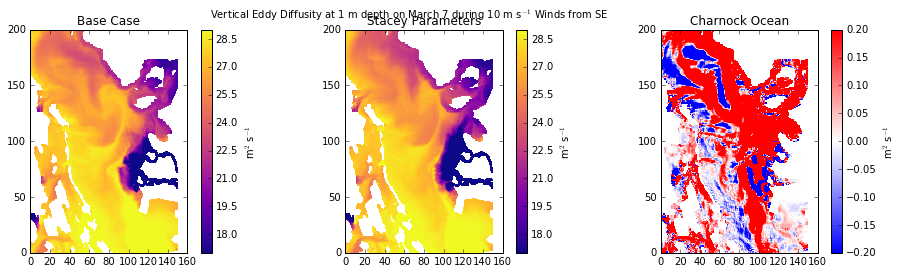

In [47]:
mesh = []
imin, imax = 350, 550
jmin, jmax = 200, 350
vmin, vmax = 17, 29
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
mesh.append(axs[0].pcolormesh(vosaline[0, imin:imax, jmin:jmax], cmap='plasma', vmax=vmax, vmin=vmin))
mesh.append(axs[1].pcolormesh(vosalinea[0, imin:imax, jmin:jmax], cmap='plasma', vmax=vmax, vmin=vmin))
mesh.append(axs[2].pcolormesh(vosaline[0, imin:imax, jmin:jmax]-vosalinea[0, imin:imax, jmin:jmax], cmap='bwr', vmax=0.2, 
                              vmin=-0.2))


for ax, msh in zip([axs[0], axs[1], axs[2]], [mesh[0], mesh[1], mesh[2]]):
    viz_tools.set_aspect(ax)
    cbar = fig.colorbar(msh, ax=ax)
    cbar.set_label('m$^2$ s$^{-1}$')

fig.suptitle('Vertical Eddy Diffusity at 1 m depth on March 7 during 10 m s$^{-1}$ Winds from SE')
axs[0].set_title('Base Case')
axs[1].set_title('Stacey Parameters')
axs[2].set_title('Charnock Ocean');